In [2]:
# Run but do not modify this code
import seaborn as sns
import pandas as pd

# These two lines setup the Seaborn style 
sns.set_theme()
sns.set_context('talk')

songs = pd.read_csv('songs_1950_to_2019.csv')
#songs.head()
after2000 = songs[songs['release_date']>1999]
after2000.head()

Unnamed: 0   artist_name        track_name  release_date genre  \
4751       13766  3 doors down      duck and run          2000   pop   
4752       13767  ricky nelson    hello mary lou          2000   pop   
4753       13770  modest mouse  perfect disguise          2000   pop   
4754       13774           joe  i believe in you          2000   pop   
4755       13776          fuel      empty spaces          2000   pop   

                                                 lyrics  len    dating  \
4751  world unimportant free country tell cost live ...   71  0.000877   
4752  hello goodbye heart sweet know hello goodbye h...   58  0.000923   
4753  perfect disguise look okay best worst cause co...   32  0.002105   
4754  believe dream believe like arrow heart believe...   55  0.001224   
4755  mister maybe lend hand help drown starve soull...   49  0.001504   

      violence  world/life  ...   sadness  feelings  danceability  loudness  \
4751  0.000877    0.407802  ...  0.284506  0.000877      0.500704  0.773069   
4752  0.000923    0.000923  ...  0.140091  0.000923      0.570021  0.631387   
4753  0.175750    0.002105  ...  0.140042  0.070702      0.493122  0.653565   
4754  0.001224    0.725084  ...  0.058538  0.001224      0.457381  0.760634   
4755  0.384026    0.001504  ...  0.313281  0.001504      0.469295  0.814630   

      acousticness  instrumentalness   valence    energy       topic       age  
4751      0.014959          0.000072  0.849547  0.919917  world/life  0.285714  
4752      0.372489          0.000001  0.925804  0.601589    romantic  0.285714  
4753      0.732931          0.209514  0.120981  0.359339     obscene  0.285714  
4754      0.176706          0.000000  0.198269  0.525511  world/life  0.285714  
4755      0.000062          0.053644  0.343570  0.943942    violence  0.285714  

[5 rows x 31 columns]

In [13]:
years_accoustic = songs.groupby('release_date')['acousticness'].mean()
#print(years_accoustic)
accoustic_line = sns.relplot(data = years_accoustic, kind = 'line')
accoustic_line


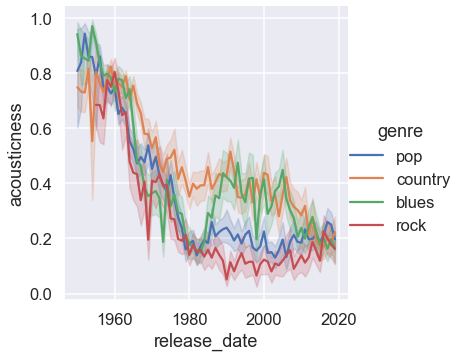

In [14]:
top_genres = songs.groupby('genre').count()
gs = ['pop', 'country', 'blues', 'rock']
boolers = songs['genre'].isin(gs)
g = songs[boolers]
#print(g)
genres_acoustic = sns.relplot(data = g, x = 'release_date', y = 'acousticness', hue = 'genre', kind = 'line')
genres_acoustic

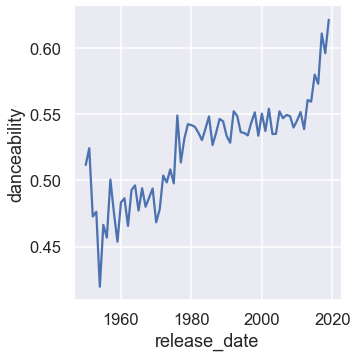

In [18]:
years_dance = songs.groupby('release_date')['danceability'].mean()
#print(years_accoustic)
dance_line = sns.relplot(data = years_dance, kind = 'line')
dance_line

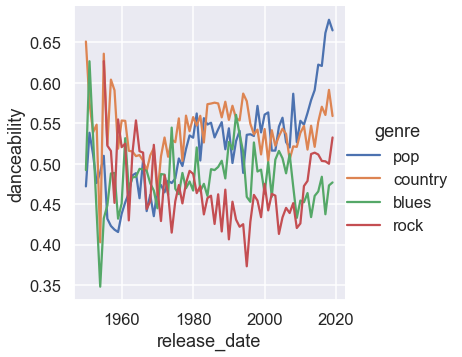

In [21]:
genres_dance = sns.relplot(data = g, x = 'release_date', y = 'danceability', hue = 'genre', kind = 'line', ci = None)
genres_dance

In [26]:
years_danceability = after2000.groupby('release_date')['danceability'].mean()
#print(years_accoustic)
dance_line = sns.relplot(data = years_danceability, kind = 'line')
dance_line

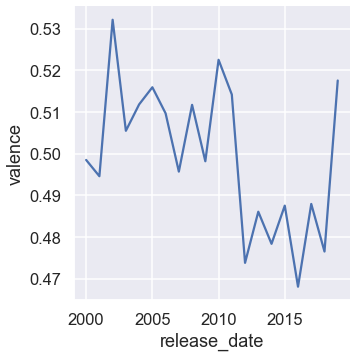

In [25]:
years_valence = after2000.groupby('release_date')['valence'].mean()
#print(years_accoustic)
years_valence = sns.relplot(data = years_valence, kind = 'line')
years_valence

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures


spotify = pd.read_csv('spotify-2000.csv')

spotify.head()

#sns.scatterplot(data = spotify, x = 'Valence', y = 'Popularity')

Index                   Title             Artist            Top Genre  \
0      1                 Sunrise        Norah Jones      adult standards   
1      2             Black Night        Deep Purple           album rock   
2      3          Clint Eastwood           Gorillaz  alternative hip hop   
3      4           The Pretender       Foo Fighters    alternative metal   
4      5  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0  2004                     157      30            53            -14   
1  2000                     135      79            50            -11   
2  2001                     168      69            66             -9   
3  2007                     173      96            43             -4   
4  2002                     106      82            58             -5   

   Liveness  Valence Length (Duration)  Acousticness  Speechiness  Popularity  
0        11       68               201            94            3          71  
1        17       81               207            17            7          39  
2         7       52               341             2           17          69  
3         3       37               269             0            4          76  
4        10       87               256             1            3          59

In [28]:
data = spotify[["Valence", 'Danceability', 'Energy', 'Liveness', 'Loudness (dB)',
                'Acousticness', 'Beats Per Minute (BPM)', 'Speechiness']].values
target = spotify['Popularity'].values
squared_data = PolynomialFeatures(3, include_bias = True).fit_transform(data)

model1 = LinearRegression()
model1.fit(X = data, y = target)

quadratic_model = LinearRegression()
quadratic_model.fit(X = squared_data, y = target)

spotify['predicted_popularity'] = model1.predict(data)
spotify['quadratic_popularity'] = quadratic_model.predict(squared_data)
#print(penguins)

dance_mse = mean_squared_error(spotify['Popularity'].values, spotify['predicted_popularity'].values)
dance_r2 = r2_score(spotify['Popularity'].values, spotify['predicted_popularity'].values)

dance_mse2 = mean_squared_error(spotify['Popularity'].values, spotify['quadratic_popularity'].values)
dance_r22 = r2_score(spotify['Popularity'].values, spotify['quadratic_popularity'].values)

print("basic")
print("MSE:", dance_mse, "r^2:", dance_r2)

print('cubic')
print("MSE:", dance_mse2, "r^2:", dance_r22)

basic
MSE: 191.31788055952998 r^2: 0.07066402998414756
cubic
MSE: 175.3087241779496 r^2: 0.14842929077158395


In [71]:
#sns.relplot(data = spotify, x = 'release_date', y = 'danceability', type = 'line')
#sns.relplot(data = spotify, x = 'release_date', y = 'predicted_danceability', type = 'line')

#sns.scatterplot(data = spotify, x = 'release_date', y = 'danceability')
#sns.scatterplot(data = spotify, x = 'release_date', y = 'quadratic_danceability')

#!pip install -U pandasql
import pandasql as ps



q1 = """SELECT Artist, count(*) as count, MAX(year) - MIN(year) AS Range, COUNT(DISTINCT year) AS Release_Years, AVG(Popularity)
FROM spotify
GROUP BY Artist
ORDER BY count DESC
LIMIT 10;"""
#print(ps.sqldf(q1, locals()))
counts = ps.sqldf(q1, locals())


q2 = """SELECT Artist, count(*) as count, MAX(year) - MIN(year) AS Range, COUNT(DISTINCT year) AS Release_Years, AVG(Popularity)
FROM spotify
GROUP BY Artist
ORDER BY Release_Years DESC
LIMIT 10;"""
#print(ps.sqldf(q2, locals()))
years = ps.sqldf(q2, locals())

q4 = """SELECT Artist, count(*) as count, MAX(year) - MIN(year) AS Range, COUNT(DISTINCT year) AS Release_Years, AVG(Popularity)
FROM spotify
GROUP BY Artist
HAVING count>4
ORDER BY AVG(Popularity) DESC
LIMIT 10;"""
#print(ps.sqldf(q4, locals()))
popular = ps.sqldf(q4, locals())


q3 = """SELECT Artist, count(*) as count, COUNT(DISTINCT year) AS Release_Years,
AVG(Popularity) AS Popularity, AVG(Danceability) AS Danceability, AVG(Valence) AS Valence
FROM spotify
GROUP BY Artist
ORDER BY count DESC;"""
top_artists = ps.sqldf(q3, locals())
#top_artists.head()

#sns.scatterplot(data = top_artists, x= 'Release_Years', y='Danceability')
avg_danceability = top_artists['Danceability'].mean()
print(avg_danceability)




53.60678115932007


48.893108008341756


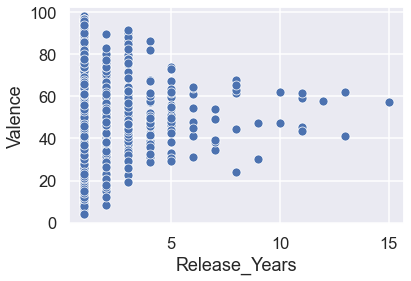

In [58]:
sns.scatterplot(data = top_artists, x= 'Release_Years', y='Valence')
avg_Valence = top_artists['Valence'].mean()
print(avg_Valence)